In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('browsing_data.csv',encoding='ISO-8859-1',index_col='_unit_id')
df = df.sample(frac = 1) 
df.shape

(509, 4)

In [3]:
df.columns

Index(['query', 'source', 'product_description', 'product_link'], dtype='object')

In [4]:
df.head()

,query,source,product_description,product_link
_unit_id,,,,
711174850,Vanilla Scented Perfumes,flipkart,A powerful blend of the decadent sweetness of ...,http://www.walmart.com/ip/AzureGreen-OAVM-Vani...
711165627,nike womens,google.com,A modern rendition on a track-and-field classi...,http://www.shop.com/Nike+Tempo+Modern+Embossed...
711171126,san francisco 49ers,google.com,Support your team by wearing a classic team fo...,http://www.shop.com/Gamewear+NFL+Leather+Class...
711165870,double stroller,google.com,Cruise on with your children comfortably in to...,http://www.shop.com/nbts/p901184139-xinternals...
711165511,coffee grinder,google.com,The Soy abella Soymilk Maker is the elegantly ...,http://www.shop.com/Tribest+SB+130+Soy+abella+...


In [5]:
df = df.dropna()
x1 = df[['query','product_description']]
x1.head()

,query,product_description
_unit_id,,
711174850,Vanilla Scented Perfumes,A powerful blend of the decadent sweetness of ...
711165627,nike womens,A modern rendition on a track-and-field classi...
711171126,san francisco 49ers,Support your team by wearing a classic team fo...
711165870,double stroller,Cruise on with your children comfortably in to...
711165511,coffee grinder,The Soy abella Soymilk Maker is the elegantly ...


In [6]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(x1['query'],x1['product_description'])
x

<509x142 sparse matrix of type '<class 'numpy.float64'>'
	with 1132 stored elements in Compressed Sparse Row format>

In [7]:
print(vectorizer.get_feature_names())

['15', '49ers', 'acoustic', 'adidas', 'aroma', 'bag', 'bags', 'batteries', 'bedspreads', 'bike', 'bird', 'black', 'blue', 'boot', 'boots', 'bras', 'brett', 'candle', 'chairs', 'clamp', 'clothes', 'coffee', 'conrad', 'cooker', 'cookware', 'corded', 'cowboy', 'cream', 'crocs', 'dc', 'diamond', 'diffuser', 'dinner', 'double', 'drawer', 'dress', 'dresses', 'drive', 'earbuds', 'ecco', 'eye', 'face', 'fair', 'favre', 'feeder', 'fifa', 'foam', 'fossil', 'fragance', 'francisco', 'gold', 'grinder', 'guitar', 'hard', 'headphones', 'headset', 'high', 'holders', 'ice', 'jeans', 'jersey', 'kitchen', 'kitchenaid', 'laptop', 'lauren', 'lc', 'led', 'lenovo', 'levis', 'lock', 'maker', 'mat', 'memory', 'mens', 'minecraft', 'mixer', 'monitor', 'mouse', 'mutant', 'necklace', 'nike', 'ninja', 'ny', 'organizer', 'oven', 'panasonic', 'pants', 'perfumes', 'pillow', 'pirates', 'pittsburgh', 'plain', 'plantronics', 'playstation', 'polarized', 'portable', 'pressure', 'rachel', 'rack', 'rain', 'ray', 'rechargable

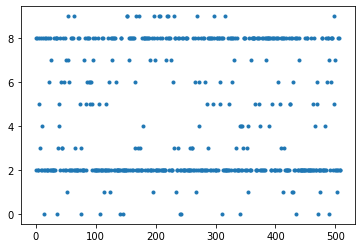

In [8]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
plt.plot(y_kmeans, ".")
plt.show()

In [9]:
# # Optimal clusters is 

true_k = 8

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(x)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 adidas
 shoes
 dress
 cream
 crocs
 fragance
 nike
 coffee
 grinder
 gold
Cluster 1:
 dresses
 conrad
 lc
 lauren
 feeder
 francisco
 fragance
 fossil
 foam
 fifa
Cluster 2:
 headphones
 earbuds
 yoga
 fifa
 gold
 francisco
 fragance
 fossil
 foam
 feeder
Cluster 3:
 drawer
 organizer
 guitar
 gold
 francisco
 fragance
 fossil
 foam
 fifa
 feeder
Cluster 4:
 playstation
 yoga
 feeder
 francisco
 fragance
 fossil
 foam
 fifa
 favre
 grinder
Cluster 5:
 boots
 cowboy
 snow
 feeder
 francisco
 fragance
 fossil
 foam
 fifa
 yoga
Cluster 6:
 levis
 yoga
 feeder
 gold
 francisco
 fragance
 fossil
 foam
 fifa
 favre
Cluster 7:
 silver
 ring
 necklace
 jeans
 fragance
 fossil
 foam
 fifa
 feeder
 favre


In [10]:
print("Cluster ID:")
Y = vectorizer.transform(["playstation"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[4]


In [11]:
df['cluster'] = model.labels_

In [12]:
df['cluster'].value_counts()

0    398
5     22
7     21
1     17
3     15
4     13
6     12
2     11
Name: cluster, dtype: int64

In [13]:
df.sample(n=10)

,query,source,product_description,product_link,cluster
_unit_id,,,,,
711161487,nike shoes,amazon,The Range Jr. from Nike is the perfect shoe fo...,http://www.overstock.com/Sports-Toys/Nike-Juni...,0
711174953,vanity fair bras,flipkart,Just My Size Full Figure Satin Stretch Wirefre...,http://www.walmart.com/ip/Just-My-Size-Full-Fi...,0
711174494,lc lauren conrad dresses,flipkart,These Concepts Women's 8 in 1 Convertible Dres...,http://www.walmart.com/ip/Concepts-Women-s-8-i...,1
711161479,wireless mouse,amazon,The HP Comfort Grip Wireless Mouse features a ...,http://www.overstock.com/Electronics/HP-Comfor...,0
711166158,spiderman,google.com,This matching cargo annd t-shirt set is sure t...,http://www.shop.com/nbts/p1238474516-xinternal...,0
711165677,face cream,google.com,"An all-in-one quad to contour, highlight and c...",http://www.shop.com/Motives+reg+for+La+La+Colo...,0
711175863,teenage mutant ninja turtles,flipkart,This Teenage Mutant Ninja Turtles Sewer Lair P...,http://www.walmart.com/ip/Nickelodeon-Teenage-...,0
711162347,wine rack,amazon,Safely secure your wines in the Powell Reflect...,http://www.overstock.com/Home-Garden/Powell-Re...,0
711174716,drawer organizer,flipkart,Keep your essentials neatly stored in one conv...,http://www.walmart.com/ip/Rubbermaid-6pc-Drawe...,3


In [14]:
def recomm_links(user_query,vectorizer=vectorizer,df=df):
    y = vectorizer.transform([user_query])
    cluster_id = model.predict(y)
    r = df.loc[(df['source']=='flipkart') & (df['cluster']==cluster_id[0]) & (df['query']==user_query)]
    r1 = df.loc[(df['source']=='flipkart') & (df['cluster']==cluster_id[0])]
    print("Same Product",r['product_link'])
    print("========================================")
    print("Similar Product",r1['product_link'].sample(n=10))

In [15]:
recomm_links('gold dress')

Same Product _unit_id
711174235    http://www.walmart.com/ip/Lipstik-Little-Girls...
711174236    http://www.walmart.com/ip/Lipstik-Little-Girls...
711174238    http://www.walmart.com/ip/Lipstik-Little-Girls...
711174237    http://www.walmart.com/ip/Lipstik-Little-Girls...
711174234    http://www.walmart.com/ip/The-Rain-Kids-Girls-...
Name: product_link, dtype: object
Similar Product _unit_id
711175739    http://www.walmart.com/ip/Prepac-ESOW-0200-1-F...
711174640    http://www.walmart.com/ip/Columbus-Blue-Jacket...
711174853    http://www.walmart.com/ip/Givenchy-Organza-Eau...
711174680    http://www.walmart.com/ip/WEATHER-SPIRITS-Yout...
711175879    http://www.walmart.com/ip/Gardman-USA-NC030The...
711175376    http://www.walmart.com/ip/Huge-Double-Sleeping...
711174878    http://www.walmart.com/ip/Danskin-Now-Women-s-...
711175393    http://www.walmart.com/ip/Ozark-Trail-ENV-Zero...
711175893    http://www.walmart.com/ip/Spiderwire-Fletcher-...
711175273    http://www.walmart.com/i